In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [2]:
df = pd.read_csv("data/LoanApprovalPrediction.csv")
df.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Drop the Loan_ID Column

In [4]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [5]:
df.head()

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No         0.0      Graduate            No             5849   
1   Male     Yes         1.0      Graduate            No             4583   
2   Male     Yes         0.0      Graduate           Yes             3000   
3   Male     Yes         0.0  Not Graduate            No             2583   
4   Male      No         0.0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

# Exploratory data analysis

##### Distribution of Applicant Income, Co-applicant Income, Loan Amount, and Loan_Amount_Term

<IPython.core.display.Javascript object>


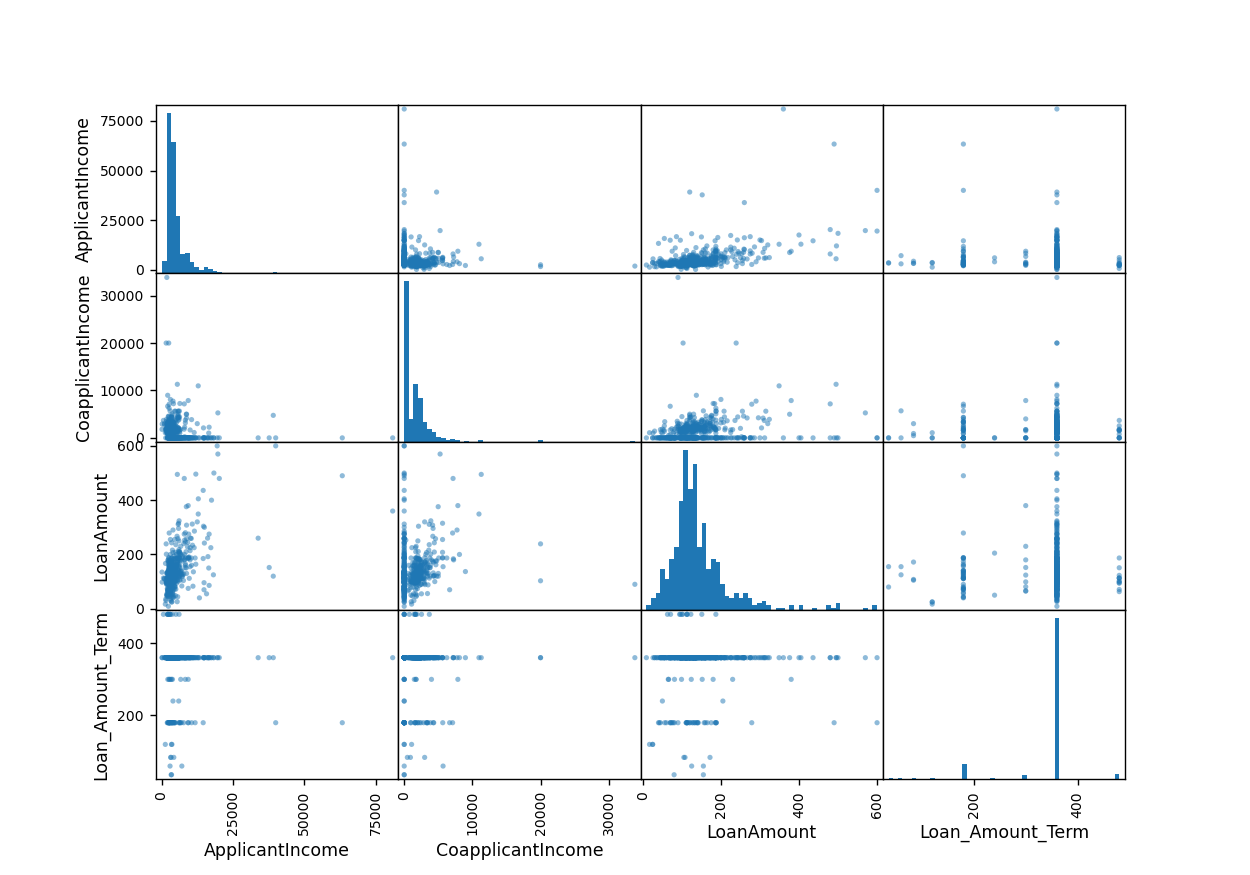

array([[<AxesSubplot:xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='CoapplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>,
        <AxesSubplot:xlabel='CoapplicantIncome', yla

In [46]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["ApplicantIncome", 
                    "CoapplicantIncome", 
                    "LoanAmount", 
                    "Loan_Amount_Term"]], figsize=(10,7), hist_kwds={'bins':50})

##### Frequencies of the catogorical variables

<IPython.core.display.Javascript object>


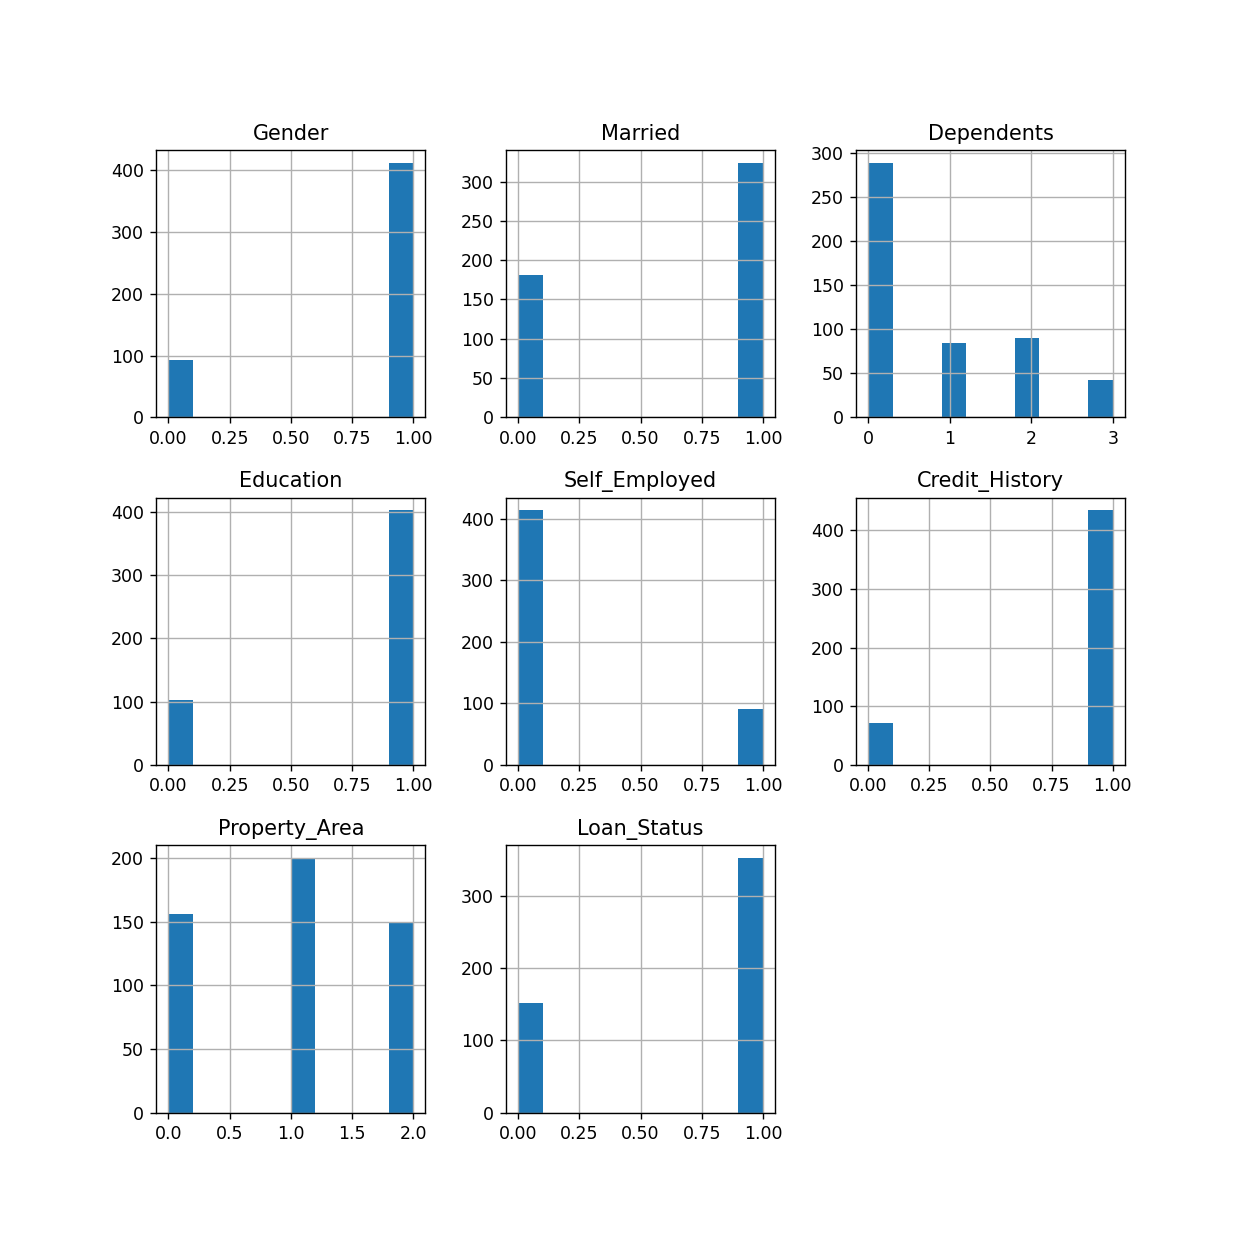

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'Credit_History'}>],
       [<AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>]],
      dtype=object)

In [41]:
df.drop(["ApplicantIncome", 
        "CoapplicantIncome", 
        "LoanAmount", 
        "Loan_Amount_Term"], axis=1).hist(figsize=(10,10))

##### Which features are correlated?

In [38]:
corr_matrix = df[["ApplicantIncome", 
                "CoapplicantIncome", 
                "LoanAmount", 
                "Loan_Amount_Term"]].corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\vabalagon\AppData\Local\Temp\ipykernel_19096\424826888.py:9: FutureWarning: `null_color` is deprecated: use `color` instead
  (corr_matrix
C:\Users\vabalagon\AppData\Local\Temp\ipykernel_19096\424826888.py:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2))


No features are strongly-correlated.

##### Balanced dataset

<IPython.core.display.Javascript object>


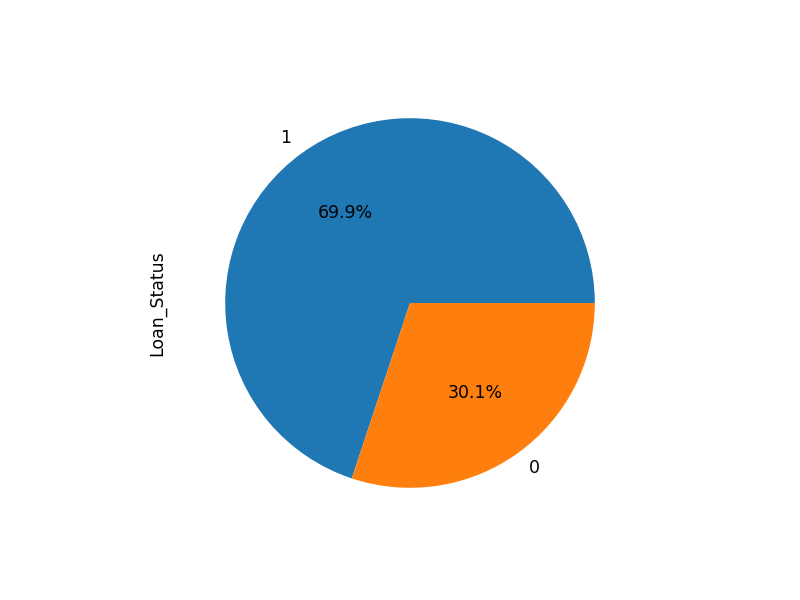

<AxesSubplot:ylabel='Loan_Status'>

In [36]:
plt.figure()
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False)

# Pre-model Data Processing

### Gender

In [19]:
df["Gender"].replace("Male", 1, inplace=True)
df["Gender"].replace("Female", 0, inplace=True)

### Married

In [20]:
df["Married"].replace("Yes", 1, inplace=True)
df["Married"].replace("No", 0, inplace=True)
df["Married"].unique()

array([0, 1], dtype=int64)

### Education

In [21]:
df["Education"].replace("Graduate", 1, inplace=True)
df["Education"].replace("Not Graduate", 0, inplace=True)
df["Education"].unique()

array([1, 0], dtype=int64)

### Self-Employed

In [22]:
df["Self_Employed"].replace("Yes", 1, inplace=True)
df["Self_Employed"].replace("No", 0, inplace=True)
df["Self_Employed"].unique()

array([0, 1], dtype=int64)

### Property_Area

In [23]:
df["Property_Area"].replace("Urban", 0, inplace=True)
df["Property_Area"].replace("Semiurban", 1, inplace=True)
df["Property_Area"].replace("Rural", 2, inplace=True)
df["Property_Area"].unique()

array([0, 2, 1], dtype=int64)

### Loan_Status

In [24]:
df["Loan_Status"].replace("Y", 1, inplace=True)
df["Loan_Status"].replace("N", 0, inplace=True)
df["Loan_Status"].unique()

array([1, 0], dtype=int64)

### Drop rows with null values

In [25]:
df.dropna(axis='rows', inplace=True)

### Split the test and train

In [26]:
from sklearn.model_selection import train_test_split
  
X = df.drop(['Loan_Status'], axis=1)
Y = df['Loan_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)

print("Number of rows")
print("\t\tX_train: ", X_train.shape[0])
print("\t\tX_test: ", X_test.shape[0])

Number of rows
		X_train:  303
		X_test:  202


# Predictive models

### kNN

### SVM

### Logistic Regression

### Naive Bayes

### Decision Tree

### Random Forest

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
  
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7)
svc = SVC(kernel='rbf', gamma=0.1)
lc = LogisticRegression()
  
# Computes the accuracy of each model
for clf in (rfc, knn, svc,lc):
    # Fits each model with the training set
    clf.fit(X_train, Y_train)
    
    # Find the predicted classification of the training data
    Y_pred = clf.predict(X_train)
    
    # Print the score
    print("Accuracy score of ",
          clf.__class__.__name__, "=", str(100*accuracy_score(Y_train, Y_pred)) + "%")

Accuracy score of  RandomForestClassifier = 98.01980198019803%
Accuracy score of  KNeighborsClassifier = 79.53795379537954%
Accuracy score of  SVC = 100.0%
Accuracy score of  LogisticRegression = 82.83828382838284%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
